In [1]:
import numpy as np
import requests
import urllib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Kakao API

- https://developers.kakao.com/docs/latest/ko/pose/dev-guide#image-pose-estimation
- Get REST API key from https://developers.kakao.com/

In [2]:
app_key = 'KakaoAK ' + '__REST_API_KEY__'

url = 'https://cv-api.kakaobrain.com/pose'

data = {
    'image_url': 'http://res.heraldm.com/phpwas/restmb_allidxmake.php?idx=71&simg=2014010541390O_0.jpg'
#     'image_url': 'https://dimg.donga.com/a/540/0/90/5/wps/NEWS/IMAGE/2020/01/15/99228046.1.jpg'
#     'image_url': 'https://lh3.googleusercontent.com/proxy/JDrZBi7o49PbVbqF3w1sH48NqNpKg_ZZjE2iYziCBCoYy50zoxqik3zC97VIc6wPeVIGEdTl1rds02Uz8U-Z4togGa7jRpeWb4c7hs_i8EMWd224BkORfun4RD7Qu-l06PGUgIHOSDQPEAIhjrUx3nsERkPthfwMrTimalPRlhyCVNd5XV9FAHR0C03PazwDcZiPzrH1VNaxhf-zfX8-9DNiVPM7VObw'
}

headers = {
    'Authorization': app_key
}

res = requests.post(url, data=data, headers=headers).json()

res

[{'area': 244869.5489,
  'bbox': [25.9094, 23.4125, 542.775, 451.1438],
  'category_id': 1,
  'keypoints': [421.8594,
   184.8047,
   0.84,
   427.2969,
   173.2266,
   0.8607,
   412.7969,
   176.7891,
   0.8945,
   380.1719,
   174.1172,
   0.0041,
   380.1719,
   174.1172,
   0.8798,
   419.1406,
   220.4297,
   0.6064,
   334.8594,
   171.4453,
   0.5228,
   470.7969,
   260.5078,
   0.6947,
   270.5156,
   123.3516,
   0.5718,
   522.4531,
   293.4609,
   0.7736,
   218.8594,
   61.0078,
   0.7212,
   277.7656,
   262.2891,
   0.3898,
   240.6094,
   240.9141,
   0.4651,
   333.9531,
   340.6641,
   0.6849,
   136.3906,
   279.2109,
   0.6965,
   258.7344,
   435.9609,
   0.5573,
   71.1406,
   257.8359,
   0.5859],
  'score': 0.6321}]

In [3]:
keypoints = np.array(res[0]['keypoints']).reshape((-1, 3))

np.set_printoptions(suppress=True)
keypoints

array([[421.8594, 184.8047,   0.84  ],
       [427.2969, 173.2266,   0.8607],
       [412.7969, 176.7891,   0.8945],
       [380.1719, 174.1172,   0.0041],
       [380.1719, 174.1172,   0.8798],
       [419.1406, 220.4297,   0.6064],
       [334.8594, 171.4453,   0.5228],
       [470.7969, 260.5078,   0.6947],
       [270.5156, 123.3516,   0.5718],
       [522.4531, 293.4609,   0.7736],
       [218.8594,  61.0078,   0.7212],
       [277.7656, 262.2891,   0.3898],
       [240.6094, 240.9141,   0.4651],
       [333.9531, 340.6641,   0.6849],
       [136.3906, 279.2109,   0.6965],
       [258.7344, 435.9609,   0.5573],
       [ 71.1406, 257.8359,   0.5859]])

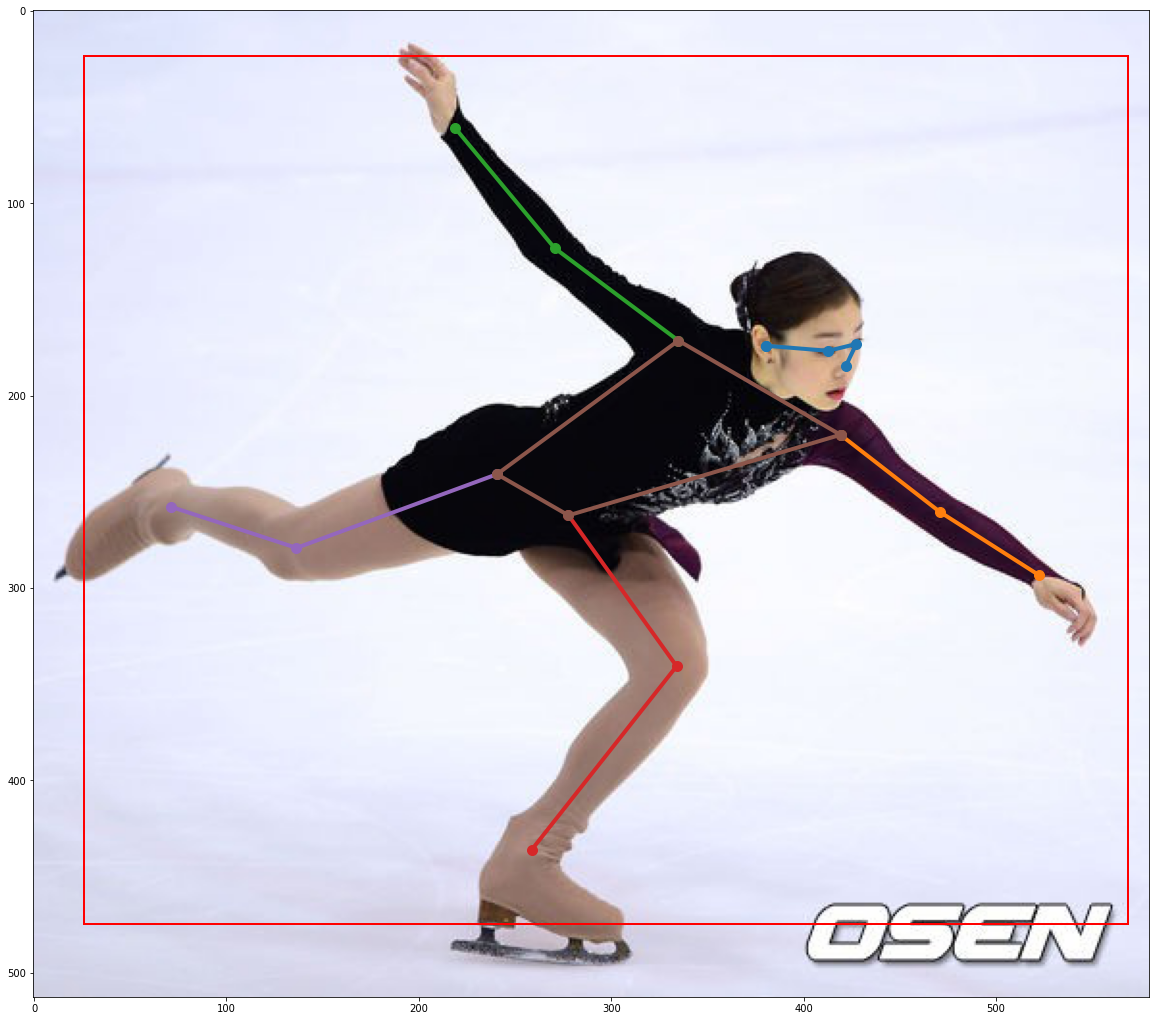

In [4]:
fig, ax = plt.subplots(figsize=(20, 20))

f = urllib.request.urlopen(data['image_url'])
img = plt.imread(f, format='jpg')

x, y, w, h = res[0]['bbox']

rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

skeleton = [
    [0, 1, 2, 3, 4],
    [5, 7, 9],
    [6, 8, 10],
    [11, 13, 15],
    [12, 14, 16],
    [5, 6, 12, 11, 5]
]

for sk in skeleton:
    coords = np.take(keypoints, sk, axis=0)

    ax.plot(coords[:, 0], coords[:, 1], marker='o', linewidth=4, markersize=10)

ax.imshow(img)
plt.show()